# Imports

In [40]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 3000)
from datetime import datetime

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")

import warnings
warnings.filterwarnings("ignore")

import scipy.stats as stats


In [41]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [42]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Read CSV

In [43]:
life_expectancy=pd.read_csv('Life Expectancy Data.csv')

In [44]:
life_expectancy.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [45]:
life_expectancy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

In [46]:
life_expectancy.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


# Data Cleaning

## Fill na

In [47]:
x=life_expectancy.groupby('Country')['Population'].max().to_dict()

In [48]:
life_expectancy['New_Population']=life_expectancy['Country'].map(x)

In [49]:
life_expectancy['New_Population'].fillna((life_expectancy['New_Population'].median))

0                                             3.37365e+07
1                                             3.37365e+07
2                                             3.37365e+07
3                                             3.37365e+07
4                                             3.37365e+07
5                                             3.37365e+07
6                                             3.37365e+07
7                                             3.37365e+07
8                                             3.37365e+07
9                                             3.37365e+07
10                                            3.37365e+07
11                                            3.37365e+07
12                                            3.37365e+07
13                                            3.37365e+07
14                                            3.37365e+07
15                                            3.37365e+07
16                                            2.99255e+06
17            

In [50]:
life_expectancy['GDP'].fillna(life_expectancy['GDP'].median(),inplace=True)

In [51]:
life_expectancy['Total expenditure'].fillna(life_expectancy['Total expenditure'].median(),inplace=True)

In [52]:
life_expectancy['Alcohol'].fillna(life_expectancy['Alcohol'].median(),inplace=True)

In [53]:
life_expectancy['Income composition of resources'].fillna(life_expectancy['Income composition of resources'].median(),inplace=True)

In [54]:
life_expectancy['Schooling'].fillna(life_expectancy['Schooling'].median(),inplace=True)

## Drop na

In [55]:
life_expectancy.dropna(inplace=True)

In [56]:
life_expectancy.drop(columns=' thinness 5-9 years',axis=1,inplace=True)

In [57]:
life_expectancy.drop(columns='Hepatitis B',axis=1,inplace=True)

In [58]:
life_expectancy.drop(columns='Population',axis=1,inplace=True)

In [59]:
life_expectancy.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
 thinness  1-19 years              0
Income composition of resources    0
Schooling                          0
New_Population                     0
dtype: int64

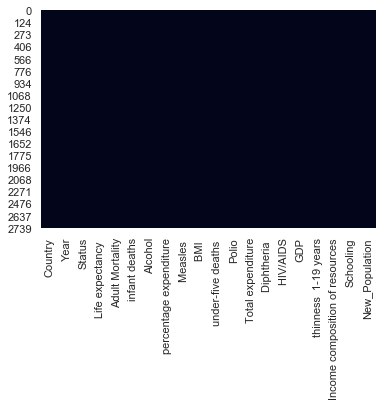

In [60]:
sns.heatmap(life_expectancy.isna(),cbar=False)

In [61]:
life_expectancy.reset_index(drop=True,inplace=True)
life_expectancy.columns=['Country', 'Year', 'Status', 'Life_expectancy', 'Adult_Mortality',
       'Infant_deaths', 'Alcohol', 'Percentage_expenditure', 'Measles',
       'BMI', 'under_five_deaths', 'Polio', 'Total_expenditure',
       'Diphtheria', 'HIV_AIDS', 'GDP', 'Thinness',
       'Income', 'Schooling', 'New_Population']

In [62]:
life_expectancy.columns

Index(['Country', 'Year', 'Status', 'Life_expectancy', 'Adult_Mortality',
       'Infant_deaths', 'Alcohol', 'Percentage_expenditure', 'Measles', 'BMI',
       'under_five_deaths', 'Polio', 'Total_expenditure', 'Diphtheria',
       'HIV_AIDS', 'GDP', 'Thinness', 'Income', 'Schooling', 'New_Population'],
      dtype='object')

##  Recursive factor extraction

In [63]:
target= 'Life_expectancy'

In [64]:
predictors= life_expectancy.drop(columns=['Life_expectancy','Country','Status'])
predictors.columns

Index(['Year', 'Adult_Mortality', 'Infant_deaths', 'Alcohol',
       'Percentage_expenditure', 'Measles', 'BMI', 'under_five_deaths',
       'Polio', 'Total_expenditure', 'Diphtheria', 'HIV_AIDS', 'GDP',
       'Thinness', 'Income', 'Schooling', 'New_Population'],
      dtype='object')

In [123]:
linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select=1)
selector = selector.fit(predictors, life_expectancy[target])

In [124]:
selector.ranking_

array([ 5, 11,  8,  6, 14, 16, 10,  9, 13,  4, 12,  3, 15,  7,  1,  2, 17])

In [125]:
list(zip(predictors.columns,selector.ranking_))

[('Year', 5),
 ('Adult_Mortality', 11),
 ('Infant_deaths', 8),
 ('Alcohol', 6),
 ('Percentage_expenditure', 14),
 ('Measles', 16),
 ('BMI', 10),
 ('under_five_deaths', 9),
 ('Polio', 13),
 ('Total_expenditure', 4),
 ('Diphtheria', 12),
 ('HIV_AIDS', 3),
 ('GDP', 15),
 ('Thinness', 7),
 ('Income', 1),
 ('Schooling', 2),
 ('New_Population', 17)]

# Models

In [68]:
X=life_expectancy.drop(columns=['Life_expectancy','Country','Status'])
y=life_expectancy['Life_expectancy']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

In [113]:
X=life_expectancy.drop(columns=['Life_expectancy','Country','Status'])
X.head()

,Year,Adult_Mortality,Infant_deaths,Alcohol,Percentage_expenditure,Measles,BMI,under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Thinness,Income,Schooling,New_Population
0,2015,263.0,62,0.01,71.279624,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,17.2,0.479,10.1,33736494.0
1,2014,271.0,64,0.01,73.523582,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,17.5,0.476,10.0,33736494.0
2,2013,268.0,66,0.01,73.219243,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,17.7,0.470,9.9,33736494.0
3,2012,272.0,69,0.01,78.184215,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,17.9,0.463,9.8,33736494.0
4,2011,275.0,71,0.01,7.097109,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,18.2,0.454,9.5,33736494.0


In [70]:
form = 'Life_expectancy~Adult_Mortality+Infant_deaths+Alcohol+Percentage_expenditure+Measles+BMI+under_five_deaths+Polio+Total_expenditure+Diphtheria+HIV_AIDS+GDP+Thinness+Income+Schooling+New_Population'

In [71]:
model=ols(formula=form,data=life_expectancy).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     555.2
Date:                Tue, 25 Feb 2020   Prob (F-statistic):               0.00
Time:                        20:27:32   Log-Likelihood:                -4811.9
No. Observations:                1790   AIC:                             9658.
Df Residuals:                    1773   BIC:                             9751.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 53.0352      0.707     75.018      0.000      51.649      54.422
Adult_Mortality           -0.0175      0.001    -19.153      0.000      -0.019      -0.016
Infant_deaths              0.0892      0.011      7.929      0.000       0.067       0.111
Alcohol                   -0.0679      0.030     -2.294      0.022      -0.126      -0.010
Percentage_expenditure     0.0003      0.000      2.323      0.020    4.85e-05       0.001
Measles                -1.064e-05   1.11e-05     -0.956      0.339   -3.25e-05    1.12e-05
BMI                        0.0301      0.006      5.343      0.000       0.019       0.041
under_five_deaths         -0.0668      0.008     -8.664      0.000      -0.082      -0.052
Polio                      0.0105      0.005      2.210      0.027       0.001       0.020
Total_expenditure          0.0770      0.040      1.912      0.056      -0.002       0.156
Diphtheria                 0.0117      0.005      2.338      0.019       0.002       0.021
HIV_AIDS                  -0.4324      0.018    -24.563      0.000      -0.467      -0.398
GDP                     2.457e-05   2.07e-05      1.185      0.236   -1.61e-05    6.52e-05
Thinness                  -0.0687      0.026     -2.630      0.009      -0.120      -0.017
Income                    10.4595      0.818     12.784      0.000       8.855      12.064
Schooling                  0.8555      0.058     14.878      0.000       0.743       0.968
New_Population         -5.846e-10   1.91e-09     -0.306      0.760   -4.33e-09    3.16e-09
==============================================================================
Omnibus:                       42.335   Durbin-Watson:                   0.708
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               79.988
Skew:                          -0.147   Prob(JB):                     4.27e-18
Kurtosis:                       3.993   Cond. No.                     1.18e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.18e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [170]:
#plt.style.use('fivethirtyeight')
plt.style.use('seaborn-dark-palette')
plt.style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'tableau-colorblind10',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

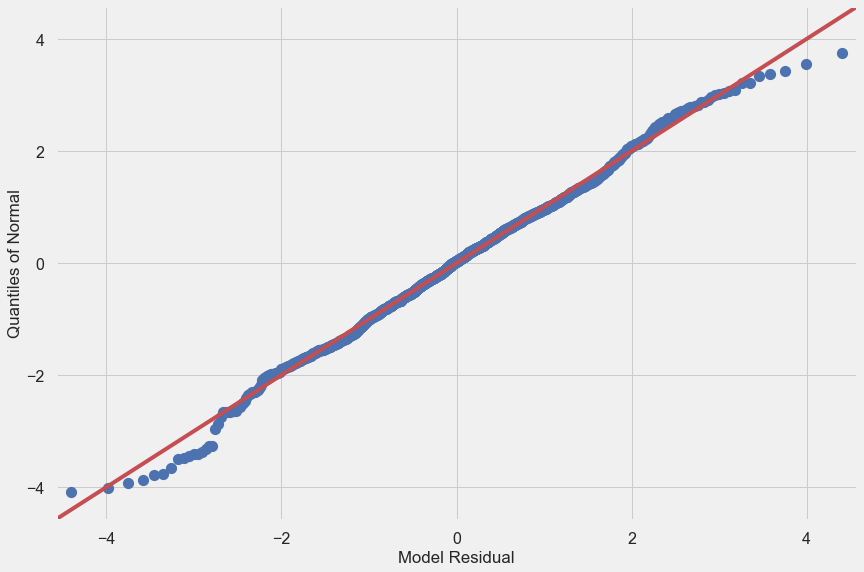

In [171]:
res = model.resid
fig = sm.qqplot(res, stats.t, fit=True, line='45',xlabel='Model Residual',ylabel="Quantiles of Normal")

fig.show()

In [151]:
form = 'Life_expectancy~HIV_AIDS+Income+Income+Schooling'

In [152]:
lr_model = ols(formula=form, data=life_expectancy).fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     1911.
Date:                Tue, 25 Feb 2020   Prob (F-statistic):               0.00
Time:                        21:31:47   Log-Likelihood:                -5130.3
No. Observations:                1790   AIC:                         1.027e+04
Df Residuals:                    1786   BIC:                         1.029e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     46.0529      0.468     98.419      0.000      45.135      46.971
HIV_AIDS      -0.6324      0.018    -35.363      0.000      -0.668      -0.597
Income        15.1195      0.921     16.419      0.000      13.313      16.926
Schooling      1.2297      0.059     20.853      0.000       1.114       1.345
==============================================================================
Omnibus:                       22.552   Durbin-Watson:                   0.363
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.073
Skew:                          -0.080   Prob(JB):                     1.47e-08
Kurtosis:                       3.677   Cond. No.                         116.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [153]:
formula= 'Life_expectancy~Income+Schooling+HIV_AIDS'
model=ols(formula=formula,data=life_expectancy).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     1911.
Date:                Tue, 25 Feb 2020   Prob (F-statistic):               0.00
Time:                        21:33:00   Log-Likelihood:                -5130.3
No. Observations:                1790   AIC:                         1.027e+04
Df Residuals:                    1786   BIC:                         1.029e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     46.0529      0.468     98.419      0.000      45.135      46.971
Income        15.1195      0.921     16.419      0.000      13.313      16.926
Schooling      1.2297      0.059     20.853      0.000       1.114       1.345
HIV_AIDS      -0.6324      0.018    -35.363      0.000      -0.668      -0.597
==============================================================================
Omnibus:                       22.552   Durbin-Watson:                   0.363
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.073
Skew:                          -0.080   Prob(JB):                     1.47e-08
Kurtosis:                       3.677   Cond. No.                         116.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [160]:
X_test.head()

,Year,Adult_Mortality,Infant_deaths,Alcohol,Percentage_expenditure,Measles,BMI,under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Thinness,Income,Schooling,New_Population
552,2013,192.0,0,0.01,460.648780,0,61.1,0,99.0,4.26,99.0,0.1,4763.689560,4.0,0.719,15.0,892149.0
993,2008,132.0,3,0.47,438.451921,334,33.4,4,97.0,3.47,97.0,0.1,8513.629541,8.5,0.747,12.5,28635128.0
640,2014,73.0,0,7.53,2163.043414,1,66.0,0,99.0,8.80,99.0,0.1,21673.781700,0.8,0.862,17.2,11121341.0
1274,2013,125.0,8,5.38,946.652116,0,54.2,11,71.0,5.23,88.0,0.1,6583.116248,1.1,0.731,13.4,31376671.0
548,2008,289.0,177,1.13,38.557833,3511,14.9,270,63.0,4.28,54.0,2.4,325.382554,11.2,0.378,7.6,97366774.0


In [77]:
formula='Life_expectancy~Income+Total_expenditure'
model=ols(formula=formula,data=life_expectancy).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     1031.
Date:                Tue, 25 Feb 2020   Prob (F-statistic):          2.12e-298
Time:                        20:27:32   Log-Likelihood:                -5730.4
No. Observations:                1790   AIC:                         1.147e+04
Df Residuals:                    1787   BIC:                         1.148e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            46.2861      0.592     78.208      0.000      45.125      47.447
Income               34.9508      0.791     44.192      0.000      33.400      36.502
Total_expenditure     0.1578      0.065      2.445      0.015       0.031       0.284
==============================================================================
Omnibus:                      173.068   Durbin-Watson:                   0.349
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1025.778
Skew:                           0.224   Prob(JB):                    1.80e-223
Kurtosis:                       6.681   Cond. No.                         42.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
formula='Life_expectancy~Country'
model=ols(formula=formula,data=life_expectancy).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     162.6
Date:                Tue, 25 Feb 2020   Prob (F-statistic):               0.00
Time:                        20:27:32   Log-Likelihood:                -4058.2
No. Observations:                1790   AIC:                             8382.
Df Residuals:                    1657   BIC:                             9113.
Df Model:                         132                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              58.1938      0.607     95.894      0.000      57.003      59.384
Country[T.Albania]                     16.9625      0.858     19.765      0.000      15.279      18.646
Country[T.Algeria]                     16.1312      0.927     17.402      0.000      14.313      17.949
Country[T.Angola]                      -7.3271      1.011     -7.244      0.000      -9.311      -5.343
Country[T.Argentina]                   17.1205      0.888     19.272      0.000      15.378      18.863
Country[T.Armenia]                     15.2062      0.858     17.718      0.000      13.523      16.890
Country[T.Australia]                   23.7729      0.872     27.250      0.000      22.062      25.484
Country[T.Austria]                     23.2875      0.858     27.135      0.000      21.604      24.971
Country[T.Azerbaijan]                  13.0634      0.888     14.705      0.000      11.321      14.806
Country[T.Bangladesh]                  11.9139      0.906     13.145      0.000      10.136      13.692
Country[T.Belarus]                     11.7125      0.858     13.647      0.000      10.029      13.396
Country[T.Belgium]                     22.4875      0.858     26.202      0.000      20.804      24.171
Country[T.Belize]                      11.0750      0.858     12.905      0.000       9.392      12.758
Country[T.Benin]                       -0.3223      0.888     -0.363      0.717      -2.065       1.420
Country[T.Bhutan]                       7.9687      0.858      9.285      0.000       6.285       9.652
Country[T.Bosnia and Herzegovina]      18.0896      0.927     19.514      0.000      16.271      19.908
Country[T.Botswana]                    -2.1437      0.858     -2.498      0.013      -3.827      -0.460
Country[T.Brazil]                      15.1875      0.858     17.696      0.000      13.504      16.871
Country[T.Bulgaria]                    14.6562      0.858     17.077      0.000      12.973      16.340
Country[T.Burkina Faso]                -0.6937      0.979     -0.709      0.478      -2.613       1.226
Country[T.Burundi]                     -1.8688      0.927     -2.016      0.044      -3.687      -0.051
Country[T.Cabo Verde]                  14.4777      0.888     16.297      0.000      12.735      16.220
Country[T.Cambodia]                     8.4662      0.979      8.652      0.000       6.547      10.386
Country[T.Cameroon]                    -3.1119      0.951     -3.273      0.001      -4.977      -1.247
Country[T.Canada]                      24.0370      0.906     26.520      0.000      22.259      25.815
Country[T.Central African Republic]    -6.6223      1.100     -6.020      0.000      -8.780      -4.465
Country[T.Chad]                        -5.8063      1.051     -5.52

In [79]:
formula='Life_expectancy~New_Population'
model=ols(formula=formula,data=life_expectancy).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.156
Date:                Tue, 25 Feb 2020   Prob (F-statistic):              0.142
Time:                        20:27:32   Log-Likelihood:                -6415.9
No. Observations:                1790   AIC:                         1.284e+04
Df Residuals:                    1788   BIC:                         1.285e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         69.4923      0.215    322.537      0.000      69.070      69.915
New_Population -2.694e-09   1.83e-09     -1.468      0.142   -6.29e-09    9.05e-10
==============================================================================
Omnibus:                      102.145   Durbin-Watson:                   0.201
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              119.273
Skew:                          -0.632   Prob(JB):                     1.26e-26
Kurtosis:                       3.057   Cond. No.                     1.23e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.23e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Train test split 

## sk linear model

In [80]:
X=life_expectancy.drop(columns=['Life_expectancy','Country','Status'])
y=life_expectancy['Life_expectancy']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

In [81]:
Multi_Regression_model = linear_model.LinearRegression()
Multi_Regression_model.fit(X_train,y_train)
y_train_pred = Multi_Regression_model.predict(X_train)
y_test_pred = Multi_Regression_model.predict(X_test)

In [82]:
train_rmse = metrics.mean_absolute_error(y_train, y_train_pred)
test_rmse = metrics.mean_absolute_error(y_test, y_test_pred)
print ("R^2 Score Training:", Multi_Regression_model.score(X_train, y_train))
print('Training Error: '+ str(np.sqrt(train_rmse)))
print('')
print ("R^2 Score Test:", Multi_Regression_model.score(X_test, y_test))
print('Testing Error: '+ str(np.sqrt(test_rmse)))

R^2 Score Training: 0.83990270031002
Training Error: 1.6410166752168833

R^2 Score Test: 0.82398212913767
Testing Error: 1.6583103851296979


In [83]:
# formula= 'Life_expectancy~Measles+BMI+Polio+Thinness+HIV_AIDS+Alcohol'
X=life_expectancy[['Measles','BMI','Polio','Thinness','HIV_AIDS','Alcohol']]
y=life_expectancy['Life_expectancy']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=17)

In [84]:
Multi_Regression_model = linear_model.LinearRegression()
Multi_Regression_model.fit(X_train1,y_train1)
y_train1_pred = Multi_Regression_model.predict(X_train1)
y_test1_pred = Multi_Regression_model.predict(X_test1)

In [85]:
train_rmse = metrics.mean_absolute_error(y_train1, y_train1_pred)
test_rmse = metrics.mean_absolute_error(y_test1, y_test1_pred)
print ("R^2 Score Training:", Multi_Regression_model.score(X_train1, y_train1))
print('Training Error: '+ str(np.sqrt(train_rmse)))
print('')
print ("R^2 Score Test:", Multi_Regression_model.score(X_test1, y_test1))
print('Testing Error: '+ str(np.sqrt(test_rmse)))

R^2 Score Training: 0.6217434283766798
Training Error: 2.0567945649868022

R^2 Score Test: 0.6012996050521175
Testing Error: 2.0699884878981747


In [86]:
# formula='Life_expectancy~Income+Total_expenditure'
X=life_expectancy[['Income','Total_expenditure']]
y=life_expectancy['Life_expectancy']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=17)

In [87]:
Multi_Regression_model = linear_model.LinearRegression()
Multi_Regression_model.fit(X_train2,y_train2)
y_train2_pred = Multi_Regression_model.predict(X_train2)
y_test2_pred = Multi_Regression_model.predict(X_test2)

In [88]:
train_rmse = metrics.mean_absolute_error(y_train2, y_train2_pred)
test_rmse = metrics.mean_absolute_error(y_test2, y_test2_pred)
print ("R^2 Score Training:", Multi_Regression_model.score(X_train2, y_train2))
print('Training Error: '+ str(np.sqrt(train_rmse)))
print('')
print ("R^2 Score Test:", Multi_Regression_model.score(X_test2, y_test2))
print('Testing Error: '+ str(np.sqrt(test_rmse)))

R^2 Score Training: 0.5236129248882557
Training Error: 2.039072317415061

R^2 Score Test: 0.5806027209178739
Testing Error: 2.0248080830088204


In [89]:
# formula='Life_expectancy~Population'
X=life_expectancy[['Income','New_Population']]
y=life_expectancy['Life_expectancy']
X_train3, X_test3, y_train3, y_test3= train_test_split(X, y, test_size=0.2, random_state=17)



In [90]:
Multi_Regression_model = linear_model.LinearRegression()
Multi_Regression_model.fit(X_train3,y_train3)
y_train3_pred = Multi_Regression_model.predict(X_train3)
y_test3_pred = Multi_Regression_model.predict(X_test3)

In [91]:
train_rmse = metrics.mean_absolute_error(y_train3, y_train3_pred)
test_rmse = metrics.mean_absolute_error(y_test3, y_test3_pred)
print ("R^2 Score Training:", Multi_Regression_model.score(X_train3, y_train3))
print('Training Error: '+ str(np.sqrt(train_rmse)))
print('')
print ("R^2 Score Test:", Multi_Regression_model.score(X_test3, y_test3))
print('Testing Error: '+ str(np.sqrt(test_rmse)))

R^2 Score Training: 0.522622052610136
Training Error: 2.0448158435347548

R^2 Score Test: 0.5801128295653086
Testing Error: 2.0284497804794452


In [92]:
life_expectancy.columns

Index(['Country', 'Year', 'Status', 'Life_expectancy', 'Adult_Mortality',
       'Infant_deaths', 'Alcohol', 'Percentage_expenditure', 'Measles', 'BMI',
       'under_five_deaths', 'Polio', 'Total_expenditure', 'Diphtheria',
       'HIV_AIDS', 'GDP', 'Thinness', 'Income', 'Schooling', 'New_Population'],
      dtype='object')

## ridge & Lasso

In [150]:
from sklearn.linear_model import Ridge

print("-"*80)
print("Ridge & Lasso with alpha = 0.01")
print("-"*80)

ridge = Ridge(alpha=0.01)
ridge.fit(X_train,y_train)

lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)

lin = LinearRegression()
lin.fit(X_train, y_train)


y_train_pred_ridge = ridge.predict(X_train)
y_test_pred_ridge = ridge.predict(X_test)

train_ridge_r2 = metrics.r2_score(y_train, y_train_pred_ridge)
test_ridge_r2 = metrics.r2_score(y_test, y_test_pred_ridge)

y_train_pred_lasso = lasso.predict(X_train)
y_test_pred_lasso = lasso.predict(X_test)

train_lasso_r2 = metrics.r2_score(y_train, y_train_pred_lasso)
test_lasso_r2 = metrics.r2_score(y_test, y_test_pred_lasso)

y_train_pred_linear = lin.predict(X_train)
y_test_pred_linear = lin.predict(X_test)

train_linear_r2 = metrics.r2_score(y_train, y_train_pred_linear)
test_linear_r2 = metrics.r2_score(y_test, y_test_pred_linear)


#train_rmse = metrics.mean_absolute_error(y_train, y_train_pred)
#test_rmse = metrics.mean_absolute_error(y_test, y_test_pred)


print('Train R2 Ridge Model ',train_ridge_r2)
print('Train Error Ridge Model', np.sum((y_train - y_train_pred_ridge)**2))
print('Train RMSE Ridge Model',np.sqrt(metrics.mean_squared_error(y_train, y_train_pred_ridge)))
print('Test R2 Ridge Model ',test_ridge_r2)
print('Test Error Ridge Model', np.sum((y_test - y_test_pred_ridge)**2))
print('Test RMSE Ridge Model',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_ridge)))
print("-"*80)

print('Train R2 Lasso Model ',train_lasso_r2)
print('Train Error Lasso Model', np.sum((y_train - y_train_pred_lasso)**2))
print('Train RMSE Lasso Model',np.sqrt(metrics.mean_squared_error(y_train, y_train_pred_lasso)))
print('Test R2 Lasso Model ',test_lasso_r2)
print('Test Error Lasso Model', np.sum((y_test - y_test_pred_lasso)**2))
print('Test RMSE Lasso Model',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_lasso)))
print("-"*80)

print('Train R2 Linear Model ',train_linear_r2)
print('Train Error Linear Model', np.sum((y_train - y_train_pred_linear)**2))
print('Train RMSE Linear Model',np.sqrt(metrics.mean_squared_error(y_train, y_train_pred_linear)))
print('Test R2 Linear Model ',test_linear_r2)
print('Test Error Linear Model', np.sum((y_test - y_test_pred_linear)**2))
print('Test RMSE Linear Model',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_linear)))
print("-"*80)

--------------------------------------------------------------------------------
Ridge & Lasso with alpha = 0.01
--------------------------------------------------------------------------------
Train R2 Ridge Model  0.8399026935259133
Train Error Ridge Model 17370.767108734566
Train RMSE Ridge Model 3.4828758172828276
Test R2 Ridge Model  0.8239790527996274
Test Error Ridge Model 4873.9967420787125
Test RMSE Ridge Model 3.689785364940082
--------------------------------------------------------------------------------
Train R2 Lasso Model  0.8397875503928659
Train Error Lasso Model 17383.260289240763
Train RMSE Lasso Model 3.4841280468255627
Test R2 Lasso Model  0.8233897419581899
Test Error Lasso Model 4890.314681317888
Test RMSE Lasso Model 3.6959568281014366
--------------------------------------------------------------------------------
Train R2 Linear Model  0.83990270031002
Train Error Linear Model 17370.76637265012
Train RMSE Linear Model 3.4828757434895765
Test R2 Linear Model  

In [94]:
# formula= 'Life_expectancy~Measles+BMI+Polio+Thinness+HIV_AIDS+Alcohol'
from sklearn.linear_model import Ridge

print("-"*80)
print("Ridge & Lasso with alpha = 0.01")
print("-"*80)

ridge = Ridge(alpha=0.01)
ridge.fit(X_train1,y_train1)

lasso = Lasso(alpha=0.01)
lasso.fit(X_train1, y_train1)

lin = LinearRegression()
lin.fit(X_train1, y_train1)


y_train1_pred_ridge = ridge.predict(X_train1)
y_test1_pred_ridge = ridge.predict(X_test1)

train1_ridge_r2 = metrics.r2_score(y_train1, y_train1_pred_ridge)
test1_ridge_r2 = metrics.r2_score(y_test, y_test1_pred_ridge)

y_train1_pred_lasso = lasso.predict(X_train1)
y_test1_pred_lasso = lasso.predict(X_test1)

train1_lasso_r2 = metrics.r2_score(y_train1, y_train1_pred_lasso)
test1_lasso_r2 = metrics.r2_score(y_test1, y_test1_pred_lasso)

y_train1_pred_linear = lin.predict(X_train1)
y_test1_pred_linear = lin.predict(X_test1)

train1_linear_r2 = metrics.r2_score(y_train1, y_train1_pred_linear)
test1_linear_r2 = metrics.r2_score(y_test1, y_test1_pred_linear)


#train_rmse = metrics.mean_absolute_error(y_train, y_train_pred)
#test_rmse = metrics.mean_absolute_error(y_test, y_test_pred)


print('Train R2 Ridge Model ',train1_ridge_r2)
print('Train Error Ridge Model', np.sum((y_train1 - y_train1_pred_ridge)**2))
print('Test R2 Ridge Model ',test_ridge_r2)
print('Test Error Ridge Model', np.sum((y_test1 - y_test1_pred_ridge)**2))
print("-"*80)

print('Train R2 Lasso Model ',train1_lasso_r2)
print('Train Error Lasso Model', np.sum((y_train1 - y_train1_pred_lasso)**2))
print('Test R2 Lasso Model ',test1_lasso_r2)
print('Test Error Lasso Model', np.sum((y_test1 - y_test1_pred_lasso)**2))
print("-"*80)

print('Train R2 Linear Model ',train1_linear_r2)
print('Train Error Linear Model', np.sum((y_train1 - y_train1_pred_linear)**2))
print('Test R2 Linear Model ',test1_linear_r2)
print('Test Error Linear Model', np.sum((y_test1 - y_test1_pred_linear)**2))
print("-"*80)

--------------------------------------------------------------------------------
Ridge & Lasso with alpha = 0.01
--------------------------------------------------------------------------------
Train R2 Ridge Model  0.6217434283766606
Train Error Ridge Model 41041.332660277585
Test R2 Ridge Model  0.8239790527996274
Test Error Ridge Model 11039.961681910852
--------------------------------------------------------------------------------
Train R2 Lasso Model  0.6217432675321821
Train Error Lasso Model 41041.35011211384
Test R2 Lasso Model  0.6012234669286958
Test Error Lasso Model 11042.069446396352
--------------------------------------------------------------------------------
Train R2 Linear Model  0.6217434283766798
Train Error Linear Model 41041.3326602755
Test R2 Linear Model  0.6012996050521175
Test Error Linear Model 11039.961191831153
--------------------------------------------------------------------------------


In [95]:
# formula='Life_expectancy~Income+Total_expenditure'
from sklearn.linear_model import Ridge

print("-"*80)
print("Ridge & Lasso with alpha = 0.01")
print("-"*80)

ridge = Ridge(alpha=0.01)
ridge.fit(X_train2,y_train2)

lasso = Lasso(alpha=0.01)
lasso.fit(X_train2, y_train2)

lin = LinearRegression()
lin.fit(X_train2, y_train2)


y_train2_pred_ridge = ridge.predict(X_train2)
y_test2_pred_ridge = ridge.predict(X_test2)

train2_ridge_r2 = metrics.r2_score(y_train2, y_train2_pred_ridge)
test2_ridge_r2 = metrics.r2_score(y_test2, y_test2_pred_ridge)

y_train2_pred_lasso = lasso.predict(X_train2)
y_test2_pred_lasso = lasso.predict(X_test2)

train2_lasso_r2 = metrics.r2_score(y_train2, y_train2_pred_lasso)
test2_lasso_r2 = metrics.r2_score(y_test2, y_test2_pred_lasso)

y_train2_pred_linear = lin.predict(X_train2)
y_test2_pred_linear = lin.predict(X_test2)

train2_linear_r2 = metrics.r2_score(y_train2, y_train2_pred_linear)
test2_linear_r2 = metrics.r2_score(y_test2, y_test2_pred_linear)


#train_rmse = metrics.mean_absolute_error(y_train, y_train_pred)
#test_rmse = metrics.mean_absolute_error(y_test, y_test_pred)


print('Train R2 Ridge Model ',train2_ridge_r2)
print('Train Error Ridge Model', np.sum((y_train2 - y_train2_pred_ridge)**2))
print('Test R2 Ridge Model ',test2_ridge_r2)
print('Test Error Ridge Model', np.sum((y_test2 - y_test2_pred_ridge)**2))
print("-"*80)

print('Train R2 Lasso Model ',train2_lasso_r2)
print('Train Error Lasso Model', np.sum((y_train2 - y_train2_pred_lasso)**2))
print('Test R2 Lasso Model ',test2_lasso_r2)
print('Test Error Lasso Model', np.sum((y_test2 - y_test2_pred_lasso)**2))
print("-"*80)

print('Train R2 Linear Model ',train2_linear_r2)
print('Train Error Linear Model', np.sum((y_train2 - y_train2_pred_linear)**2))
print('Test R2 Linear Model ',test2_linear_r2)
print('Test Error Linear Model', np.sum((y_test2 - y_test2_pred_linear)**2))
print("-"*80)

--------------------------------------------------------------------------------
Ridge & Lasso with alpha = 0.01
--------------------------------------------------------------------------------
Train R2 Ridge Model  0.5236129021312539
Train Error Ridge Model 51688.62308138427
Test R2 Ridge Model  0.580574053095425
Test Error Ridge Model 11613.848983718282
--------------------------------------------------------------------------------
Train R2 Lasso Model  0.5235733480693276
Train Error Lasso Model 51692.91474882739
Test R2 Lasso Model  0.5793666121595875
Test Error Lasso Model 11647.282863498653
--------------------------------------------------------------------------------
Train R2 Linear Model  0.5236129248882557
Train Error Linear Model 51688.62061221982
Test R2 Linear Model  0.5806027209178739
Test Error Linear Model 11613.055175507154
--------------------------------------------------------------------------------


In [96]:
# formula='Life_expectancy~Population'
from sklearn.linear_model import Ridge

print("-"*80)
print("Ridge & Lasso with alpha = 0.01")
print("-"*80)

ridge = Ridge(alpha=0.01)
ridge.fit(X_train3,y_train3)

lasso = Lasso(alpha=0.01)
lasso.fit(X_train3, y_train3)

lin = LinearRegression()
lin.fit(X_train3, y_train3)


y_train3_pred_ridge = ridge.predict(X_train3)
y_test3_pred_ridge = ridge.predict(X_test3)

train3_ridge_r2 = metrics.r2_score(y_train3, y_train3_pred_ridge)
test3_ridge_r2 = metrics.r2_score(y_test3, y_test3_pred_ridge)

y_train3_pred_lasso = lasso.predict(X_train3)
y_test3_pred_lasso = lasso.predict(X_test3)

train3_lasso_r2 = metrics.r2_score(y_train3, y_train3_pred_lasso)
test3_lasso_r2 = metrics.r2_score(y_test3, y_test3_pred_lasso)

y_train3_pred_linear = lin.predict(X_train3)
y_test3_pred_linear = lin.predict(X_test3)

train3_linear_r2 = metrics.r2_score(y_train3, y_train3_pred_linear)
test3_linear_r2 = metrics.r2_score(y_test3, y_test3_pred_linear)


#train_rmse = metrics.mean_absolute_error(y_train, y_train_pred)
#test_rmse = metrics.mean_absolute_error(y_test, y_test_pred)


print('Train R2 Ridge Model ',train3_ridge_r2)
print('Train Error Ridge Model', np.sum((y_train3 - y_train3_pred_ridge)**2))
print('Test R2 Ridge Model ',test_ridge_r2)
print('Test Error Ridge Model', np.sum((y_test3 - y_test3_pred_ridge)**2))
print("-"*80)

print('Train R2 Lasso Model ',train3_lasso_r2)
print('Train Error Lasso Model', np.sum((y_train3 - y_train3_pred_lasso)**2))
print('Test R2 Lasso Model ',test3_lasso_r2)
print('Test Error Lasso Model', np.sum((y_test3 - y_test3_pred_lasso)**2))
print("-"*80)

print('Train R2 Linear Model ',train3_linear_r2)
print('Train Error Linear Model', np.sum((y_train3 - y_train3_pred_linear)**2))
print('Test R2 Linear Model ',test3_linear_r2)
print('Test Error Linear Model', np.sum((y_test3 - y_test3_pred_linear)**2))
print("-"*80)

--------------------------------------------------------------------------------
Ridge & Lasso with alpha = 0.01
--------------------------------------------------------------------------------
Train R2 Ridge Model  0.5226220300738267
Train Error Ridge Model 51796.133995360244
Test R2 Ridge Model  0.8239790527996274
Test Error Ridge Model 11627.432713877399
--------------------------------------------------------------------------------
Train R2 Lasso Model  0.5225827589632384
Train Error Lasso Model 51800.39496221319
Test R2 Lasso Model  0.5788553640888598
Test Error Lasso Model 11661.439254943838
--------------------------------------------------------------------------------
Train R2 Linear Model  0.522622052610136
Train Error Linear Model 51796.13155014123
Test R2 Linear Model  0.5801128295653086
Test Error Linear Model 11626.620202251714
--------------------------------------------------------------------------------


In [97]:
# formula='Life_expectancy~Population'
from sklearn.linear_model import Ridge

print("-"*80)
print("Ridge & Lasso with alpha = 0.01")
print("-"*80)

ridge = Ridge(alpha=0.01)
ridge.fit(X_train3,y_train3)

lasso = Lasso(alpha=0.01)
lasso.fit(X_train3, y_train3)

lin = LinearRegression()
lin.fit(X_train3, y_train3)


y_train3_pred_ridge = ridge.predict(X_train3)
y_test3_pred_ridge = ridge.predict(X_test3)

train3_ridge_r2 = metrics.r2_score(y_train3, y_train3_pred_ridge)
test3_ridge_r2 = metrics.r2_score(y_test3, y_test3_pred_ridge)

y_train3_pred_lasso = lasso.predict(X_train3)
y_test3_pred_lasso = lasso.predict(X_test3)

train3_lasso_r2 = metrics.r2_score(y_train3, y_train3_pred_lasso)
test3_lasso_r2 = metrics.r2_score(y_test3, y_test3_pred_lasso)

y_train3_pred_linear = lin.predict(X_train3)
y_test3_pred_linear = lin.predict(X_test3)

train3_linear_r2 = metrics.r2_score(y_train3, y_train3_pred_linear)
test3_linear_r2 = metrics.r2_score(y_test3, y_test3_pred_linear)


#train_rmse = metrics.mean_absolute_error(y_train, y_train_pred)
#test_rmse = metrics.mean_absolute_error(y_test, y_test_pred)


print('Train R2 Ridge Model ',train3_ridge_r2)
print('Train Error Ridge Model', np.sum((y_train3 - y_train3_pred_ridge)**2))
print('Test R2 Ridge Model ',test_ridge_r2)
print('Test Error Ridge Model', np.sum((y_test3 - y_test3_pred_ridge)**2))
print("-"*80)

print('Train R2 Lasso Model ',train3_lasso_r2)
print('Train Error Lasso Model', np.sum((y_train3 - y_train3_pred_lasso)**2))
print('Test R2 Lasso Model ',test3_lasso_r2)
print('Test Error Lasso Model', np.sum((y_test3 - y_test3_pred_lasso)**2))
print("-"*80)

print('Train R2 Linear Model ',train3_linear_r2)
print('Train Error Linear Model', np.sum((y_train3 - y_train3_pred_linear)**2))
print('Test R2 Linear Model ',test3_linear_r2)
print('Test Error Linear Model', np.sum((y_test3 - y_test3_pred_linear)**2))
print("-"*80)

--------------------------------------------------------------------------------
Ridge & Lasso with alpha = 0.01
--------------------------------------------------------------------------------
Train R2 Ridge Model  0.5226220300738267
Train Error Ridge Model 51796.133995360244
Test R2 Ridge Model  0.8239790527996274
Test Error Ridge Model 11627.432713877399
--------------------------------------------------------------------------------
Train R2 Lasso Model  0.5225827589632384
Train Error Lasso Model 51800.39496221319
Test R2 Lasso Model  0.5788553640888598
Test Error Lasso Model 11661.439254943838
--------------------------------------------------------------------------------
Train R2 Linear Model  0.522622052610136
Train Error Linear Model 51796.13155014123
Test R2 Linear Model  0.5801128295653086
Test Error Linear Model 11626.620202251714
--------------------------------------------------------------------------------


# Grid search

In [98]:
from sklearn.model_selection import GridSearchCV

# define the parameter values that should be searched
alpha_range = [0.001,0.01, 0.05, 0.1, 0.5, 1, 5, 10]
param_grid = dict(alpha=alpha_range)
ridge = Ridge()
grid = GridSearchCV(ridge, param_grid, cv=10, scoring='neg_mean_squared_error',verbose=1,n_jobs=-1,return_train_score=False)
grid.fit(X, y)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    2.9s finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=1)

In [99]:
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,-37.137898,20.108486,{'alpha': 0.001}
1,-37.137199,20.105732,{'alpha': 0.01}
2,-37.134131,20.093526,{'alpha': 0.05}
3,-37.130378,20.078342,{'alpha': 0.1}
4,-37.103551,19.959809,{'alpha': 0.5}
5,-37.077746,19.818742,{'alpha': 1}
6,-37.130455,18.931373,{'alpha': 5}
7,-37.657748,18.264072,{'alpha': 10}


In [100]:
# examine the first result
print(grid.cv_results_['params'][0])
print(grid.cv_results_['mean_test_score'][0])

{'alpha': 0.001}
-37.13789755897467


In [101]:
# print the array of mean scores only
grid_mean_scores = grid.cv_results_['mean_test_score']
print(grid_mean_scores)

[-37.13789756 -37.13719923 -37.13413117 -37.13037763 -37.10355135
 -37.07774634 -37.13045506 -37.65774762]


Text(0, 0.5, 'Cross-Validated MSE')

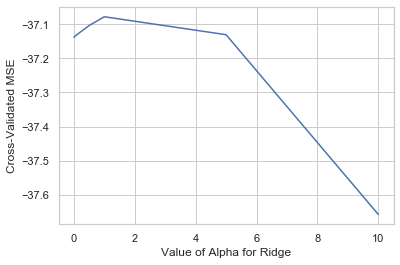

In [102]:
# plot the results
plt.plot(alpha_range, grid_mean_scores)
plt.xlabel('Value of Alpha for Ridge')
plt.ylabel('Cross-Validated MSE')

In [103]:
# examine the best model
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)



-37.077746339148426
{'alpha': 1}
Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)


In [111]:
y_predi=grid.best_estimator_.predict(X)
y_predi

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

In [112]:
#  plottings
X.head()

,Income,New_Population
0,0.479,33736494.0
1,0.476,33736494.0
2,0.470,33736494.0
3,0.463,33736494.0
4,0.454,33736494.0


In [106]:
life_expectancy.drop(columns=['Log_Income', 'Log_Life_expectancy'],inplace=True)

KeyError: "['Log_Income' 'Log_Life_expectancy'] not found in axis"

In [ ]:
x=life_expectancy.corr()

In [ ]:
abs(x>.75)

In [ ]:
sns.heatmap(x,center=0)

In [ ]:
x=life_expectancy['Life_expectancy']
sns.distplot(x)

In [ ]:
sns.distplot(life_expectancy['New_Population'])

In [ ]:
mean_life=life_expectancy.groupby('Country')['Life_expectancy'].mean()

In [ ]:
sns.distplot(mean_life)